In [1]:
import os
os.chdir('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/')

In [2]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [3]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_1 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_1.obs_names.name = "barcode"

print(adata_1)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_1.write_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/adata_1.h5ad")
print("→ Saved to adata.h5ad")


Matrix has 54922 cells × 30454 genes
AnnData object with n_obs × n_vars = 54922 × 30454
    var: 'gene_id', 'genome'


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [4]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [5]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_2 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_2.obs_names.name = "barcode"

print(adata_2)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_2.write_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/adata_2.h5ad")
print("→ Saved to adata.h5ad")

Matrix has 54855 cells × 30454 genes
AnnData object with n_obs × n_vars = 54855 × 30454
    var: 'gene_id', 'genome'


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [6]:
import scanpy as sc
adata_1 = sc.read_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/adata_1.h5ad")
adata_2 = sc.read_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees2_953/DGE_unfiltered/adata_2.h5ad")

/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
# Mutate each AnnData so that its var_names are unique
a1 = adata_1.copy()
a2 = adata_2.copy()

a1.var_names_make_unique()  
a2.var_names_make_unique()

# Now you can concat without errors
adata = anndata.concat(
    [a1, a2],
    join="outer",
    label="batch",
    keys=["batch1","batch2"],
)
print(adata)


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 109777 × 30454
    obs: 'batch'


In [8]:
print(adata)                   # Shows dimensions, annotations
print(adata.obs.head())        # Cell-level metadata
print(adata.var.head())        # Gene-level metadata

AnnData object with n_obs × n_vars = 109777 × 30454
    obs: 'batch'
               batch
barcode             
01_01_01__s1  batch1
01_01_02__s1  batch1
01_01_03__s1  batch1
01_01_04__s1  batch1
01_01_05__s1  batch1
Empty DataFrame
Columns: []
Index: [Arsj, Gad1, Alx4, Tmco5b, Cbln1]


/home/dipal/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


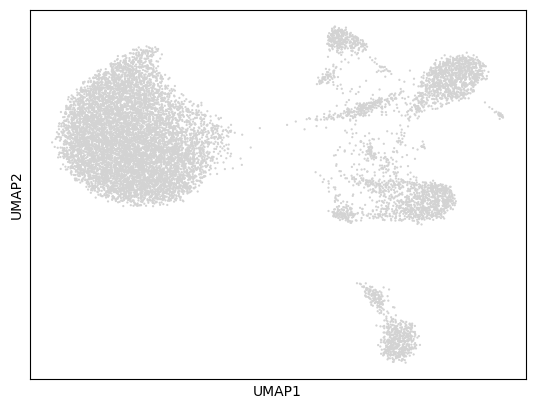

/tmp/ipykernel_7211/346393841.py:11: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


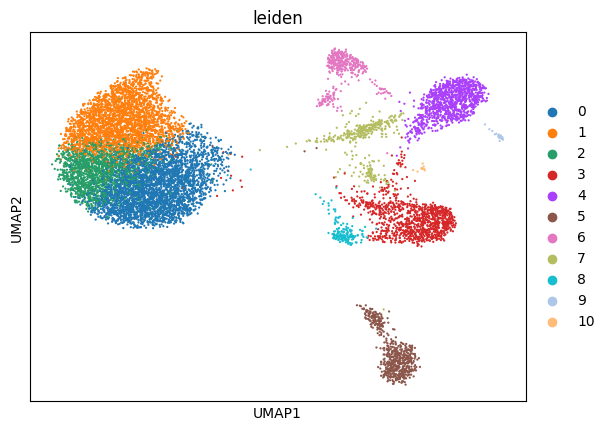

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

In [10]:
# Read the excel file
df_markers = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')

In [11]:
# Filter for rows related to immune system
immune_df = df_markers[df_markers["tissueType"] == "Immune system"]

# # Create marker dictionary
# immune_markers = {}
# for _, row in immune_df.iterrows():
#     cell_type = row["cellName"]
#     genes_raw = str(row["geneSymbolmore1"])
#     if pd.notna(genes_raw):
#         gene_list = [gene.strip() for gene in genes_raw.split(",") if gene.strip()]
#         immune_markers[cell_type] = gene_list

# # Show a preview of the marker dictionary (first 5 entries)
# dict(list(immune_markers.items())[:5])

#Columns containing comma‑separated gene lists
gene_cols = ["geneSymbolmore1", "geneSymbolmore2"]

# Build the marker dictionary
immune_markers = {}
for _, row in immune_df.iterrows():
    cell_type = row["cellName"]
    genes = []
    for col in gene_cols:
        raw = row.get(col)
        if pd.notna(raw):
            # split, strip, and extend
            genes.extend(g.strip() for g in str(raw).split(",") if g.strip())
    # optional: dedupe while preserving order
    seen = set()
    deduped = []
    for g in genes:
        if g not in seen:
            seen.add(g)
            deduped.append(g)
    immune_markers[cell_type] = deduped

# Preview the first 5 entries
import itertools
print(dict(itertools.islice(immune_markers.items(), 5)))


{'Pro-B cells': ['CD27', 'IgD', 'CD24', 'PTPRC', 'PAX5', 'CD38', 'CD79A', 'DNTT', 'C10orf10', 'VPREB1', 'ARPP21', 'CD99', 'IGLL1', 'CD9', 'CD79B', 'TCL1A', 'IGLL5', 'HLA-DQA1', 'HLA-DQB1', 'VPREB3'], 'Pre-B cells': ['CD19', 'CD27', 'IgD', 'CD24', 'PTPRC', 'PAX5', 'CD38', 'CD79A', 'NSMCE1', 'PCDH9', 'ACSM3', 'CCDC191', 'TCL1A', 'CD79B', 'IGLL5', 'HLA-DQA1', 'HLA-DQB1', 'VPREB3'], 'Naive B cells': ['CD19', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A', 'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'], 'Memory B cells': ['CD19', 'CD27', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A', 'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'], 'Plasma B cells': ['CD27', 'IgD', 'CD38', 'CD24', 'CD20', 'MS4A1', 'PTPRC', 'PAX5', 'CD79A', 'JCHAIN', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL

In [12]:

print("TEK" in adata.var_names)



False


In [13]:
adata.var_names = adata.var_names.str.upper()
print(adata.var_names)

Index(['ARSJ', 'GAD1', 'ALX4', 'HEBP1', 'TMCC2', 'NUAK2', 'KIAA1614',
       'SLC26A1', 'XPR1', 'IDUA',
       ...
       'PSPN', 'ENSRNOG00000071193', 'ENSRNOG00000071198', 'GAPDH-PS1',
       'ENSRNOG00000071206', 'ENSRNOG00000071212', 'ENSRNOG00000071214',
       'CHEK1', 'P3H3-1', 'CD4'],
      dtype='object', name='gene_symbol', length=14928)


In [14]:
# Flatten all marker genes into a list
all_marker_genes = set(gene for genes in immune_markers.values() for gene in genes)

# Check how many marker genes exist in adata
matched_genes = all_marker_genes.intersection(set(adata.var_names))
print(f"Matched {len(matched_genes)} out of {len(all_marker_genes)} marker genes.")
print(matched_genes)

Matched 126 out of 298 marker genes.
{'MRC1', 'EPHA2', 'MCAM', 'CLU', 'CST3', 'ICAM1', 'ENG', 'PPBP', 'CD2', 'ABCG2', 'CHI3L1', 'ITGA4', 'CXCR2', 'DERL3', 'GZMA', 'TPM2', 'CD9', 'ANXA3', 'CD80', 'IL3RA', 'CD6', 'CD3D', 'ACSM3', 'JCHAIN', 'RSAD2', 'KDR', 'GCA', 'CD83', 'SIGLEC8', 'FLT1', 'HPGDS', 'OASL', 'CD69', 'ALOX15', 'ERBB2', 'S100A9', 'CD33', 'LST1', 'CD27', 'BPI', 'CD79B', 'IFIT2', 'SSR4', 'GZMB', 'FOLR1', 'GPM6B', 'NRP1', 'IFIT3', 'TEK', 'GATA1', 'CCL4', 'CXCR4', 'GYPA', 'GZMM', 'CD24', 'CD79A', 'GNG11', 'SLC18A2', 'SELL', 'NSMCE1', 'MMP9', 'IL4', 'CD3E', 'PECAM1', 'CD8B', 'ELANE', 'SCARA5', 'CCDC191', 'MPO', 'NTM', 'SHD', 'PCDH9', 'KIT', 'ITGAX', 'MS4A1', 'CD4', 'ISG20', 'IL2RA', 'FCER1G', 'PDPN', 'FCGR3A', 'CCL3', 'CTLA4', 'RUVBL1', 'NKG7', 'FKBP11', 'FOXP3', 'CD38', 'MSR1', 'VPREB3', 'CLEC10A', 'CD68', 'CD40', 'VCAN', 'PTPRC', 'PROM1', 'CEBPE', 'CD163', 'IFIT1', 'CD14', 'CD63', 'IL1B', 'HDC', 'VWF', 'ASPM', 'ARPP21', 'CCR6', 'CD3G', 'PRDX4', 'S100A8', 'TFRC', 'PAX5', 'ZMAT4',

In [15]:
# for cell_type, genes in immune_markers.items():
#     valid_genes = [g.upper() for g in genes if g.upper() in adata_1.var_names]
#     if valid_genes:
#         adata_1.obs[cell_type + '_score'] = adata_1[:, valid_genes].X.mean(axis=1)

# score_cols = [col for col in adata_1.obs.columns if col.endswith('_score')]
# adata_1.obs['predicted_immune_cell_type'] = adata_1.obs[score_cols].idxmax(axis=1).str.replace('_score', '')

# 0) Make sure var_names are unique
adata.var_names_make_unique()

# 1) Score each cell type
for cell_type, genes in immune_markers.items():
    # uppercase for matching against the now‐unique var_names
    valid_genes = [g.upper() for g in genes if g.upper() in adata.var_names]
    if not valid_genes:
        continue
    # get the integer column indices
    idx = [adata.var_names.get_loc(g) for g in valid_genes]
    # compute the mean expression across those columns for each cell
    # .X may be sparse, so convert to dense array slice
    mat = adata.X[:, idx]
    # if sparse, convert to array; if dense, .A won’t exist but we can skip
    try:
        arr = mat.toarray()
    except AttributeError:
        arr = mat
    scores = arr.mean(axis=1)
    adata.obs[f"{cell_type}_score"] = scores

# 2) Pick the max‐score cell type
score_cols = [c for c in adata.obs.columns if c.endswith("_score")]
adata.obs["predicted_immune_cell_type"] = (
    adata.obs[score_cols]
         .idxmax(axis=1)
         .str.replace("_score", "")
)


In [16]:
# How many cells got each label?
print(adata.obs['predicted_immune_cell_type'].value_counts())


predicted_immune_cell_type
Progenitor cells                                9100
Erythroid-like and erythroid precursor cells    1246
Cancer cells                                     414
Megakaryocyte                                    229
ISG expressing immune cells                      225
Platelets                                         93
Intermediate monocytes                            65
Classical Monocytes                               60
Pro-B cells                                       49
Mast cells                                        42
Eosinophils                                       22
Myeloid Dendritic cells                           19
Neutrophils                                       18
γδ-T cells                                        11
Endothelial                                       10
HSC/MPP cells                                      4
Naive B cells                                      4
Basophils                                          4
Non-classical monoc

       'HLA-DQA1', 'HLA-DQB1'],
      dtype='object')
       'GNLY', 'TRAC', 'CD52', 'TRBC2', 'DAPL1', 'CD25', 'HLA-DRA', 'CD95'],
      dtype='object')
       'CD52', 'TRBC2', 'DAPL1', 'CD25', 'HLA-DRA', 'CD95'],
      dtype='object')
       'CD30', 'CD45RO', 'GNLY', 'TRAC', 'CD52', 'TRBC2', 'DAPL1'],
      dtype='object')
       'CD45RO', 'TRAC', 'CD52', 'TRBC2', 'DAPL1'],
      dtype='object')
       'CD30', 'GNLY', 'TRAC', 'CD52', 'TRBC2', 'DAPL1'],
      dtype='object')
       'TRAC', 'CD52', 'TRBC2', 'DAPL1'],
      dtype='object')
       'TRDV2', 'TRGV9', 'TRGC1', 'TRAC', 'CD52', 'TRBC2', 'DAPL1'],
      dtype='object')
       'CD314', 'CD122', 'NKG2D', 'GNLY', 'COX6A2', 'KIR2DL4'],
      dtype='object')
       'CD122', 'NKG2D', 'COX6A2', 'KIR2DL4'],
      dtype='object')
       'NKG2D', 'GNLY', 'COX6A2', 'KIR2DL4', 'CD3Z', 'CD8'],
      dtype='object')
       'PRSS33', 'THBS4'],
      dtype='object')
       'LYZ', 'PI3', 'CXCL1', 'TGM3', 'BTNL3', 'C4BPA', 'LTF', 'CHIL3'],
     

/tmp/ipykernel_7211/3743264518.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["predicted_immune_cell_type"]


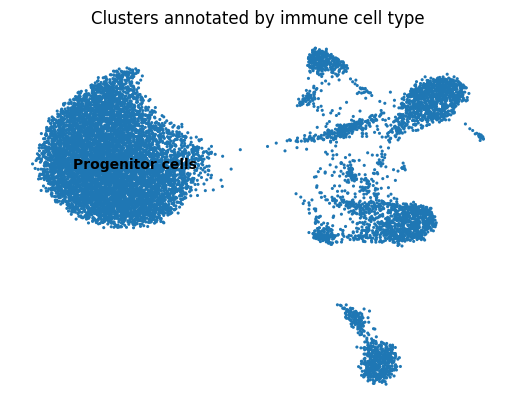

In [17]:
import scanpy as sc

# 0) Upper‑case everything so matching is case‑insensitive
adata.var_names = adata.var_names.str.upper()

# 1) Re‑build your immune_markers dict with BOTH columns, uppercased
marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
immune_markers = {}
for _, row in df_markers[df_markers["tissueType"]=="Immune system"].iterrows():
    ct = row["shortName"]
    genes = []
    for col in marker_cols:
        raw = row.get(col)
        if pd.notna(raw):
            genes += [g.strip().upper() for g in str(raw).split(",") if g.strip()]
    # dedupe
    immune_markers[ct] = list(dict.fromkeys(genes))

# 2) Use scanpy’s built‑in scoring (it will fill in zeros for any missing genes)
for cell_type, gene_list in immune_markers.items():
    # skip if no markers at all
    if not gene_list:
        continue
    sc.tl.score_genes(
        adata,
        gene_list,
        score_name=f"{cell_type}_score",
        use_raw=False,        # or True if you stored your un‑filtered matrix in adata.raw
    )

# 3) Collect all the *_score columns and pick the max per cell
score_cols = [c for c in adata.obs.columns if c.endswith("_score")]
adata.obs["predicted_immune_cell_type"] = (
    adata.obs[score_cols]
           .idxmax(axis=1)
           .str.replace("_score", "")
)

# 4) Now annotate your Leiden clusters by majority vote
sc.tl.leiden(adata, key_added="leiden")   # if you haven’t already
cluster_to_cell = (
    adata.obs
           .groupby("leiden")["predicted_immune_cell_type"]
           .agg(lambda s: s.value_counts().idxmax())
           .to_dict()
)
adata.obs["cluster_annotation"] = adata.obs["leiden"].map(cluster_to_cell)

# 5) Plot
sc.pl.umap(
    adata,
    color="cluster_annotation",
    legend_loc="on data",
    title="Clusters annotated by immune cell type",
    frameon=False,
    size=20,
)




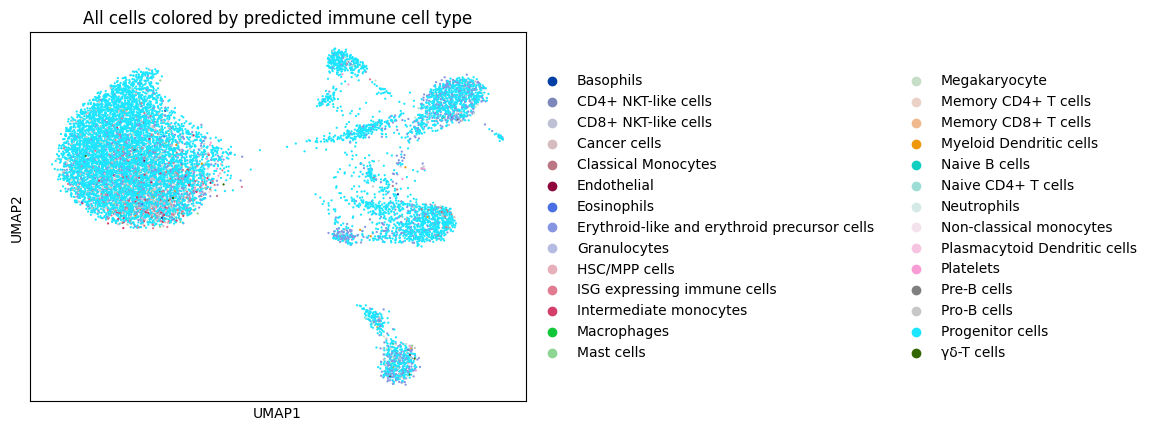

In [18]:
import scanpy as sc

sc.pl.umap(
    adata,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type"
)


In [19]:
import pandas as pd

# make a table of cluster × predicted type counts
ctab = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["predicted_immune_cell_type"]
)

# convert to fractions per cluster
frac = ctab.div(ctab.sum(axis=1), axis=0)

# show it
display(frac)


predicted_immune_cell_type,Basophils,CD4+ NKT-like cells,CD8+ NKT-like cells,Cancer cells,Classical Monocytes,Endothelial,Eosinophils,Erythroid-like and erythroid precursor cells,Granulocytes,HSC/MPP cells,...,Naive B cells,Naive CD4+ T cells,Neutrophils,Non-classical monocytes,Plasmacytoid Dendritic cells,Platelets,Pre-B cells,Pro-B cells,Progenitor cells,γδ-T cells
leiden,,,,,,,,,,,,,,,,,,,,,
0,0.000580,0.000000,0.000000,0.061467,0.008118,0.001740,0.002030,0.087562,0.00029,0.000290,...,0.000290,0.000000,0.001450,0.000580,0.000000,0.008988,0.000290,0.005509,0.723978,0.001740
1,0.000356,0.000000,0.000000,0.035943,0.000712,0.000356,0.001068,0.045907,0.00000,0.000000,...,0.000356,0.000000,0.000356,0.000356,0.000356,0.001423,0.000000,0.001423,0.881851,0.000000
2,0.000000,0.000000,0.000000,0.039403,0.000597,0.000000,0.002985,0.082388,0.00000,0.000000,...,0.000597,0.000000,0.001194,0.000000,0.000000,0.002388,0.000000,0.001194,0.810149,0.000597
3,0.000951,0.000951,0.000000,0.013321,0.026641,0.000000,0.000000,0.114177,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000951,0.000000,0.001903,0.829686,0.000000
4,0.000000,0.000961,0.001921,0.010567,0.000000,0.000000,0.000961,0.264169,0.00000,0.000961,...,0.000000,0.000961,0.000000,0.000000,0.000000,0.000000,0.000000,0.002882,0.689721,0.002882
5,0.000000,0.000000,0.000000,0.008039,0.000000,0.004823,0.000000,0.249196,0.00000,0.001608,...,0.003215,0.000000,0.000000,0.000000,0.000000,0.009646,0.001608,0.024116,0.644695,0.004823
6,0.000000,0.000000,0.000000,0.005038,0.000000,0.000000,0.000000,0.047859,0.00000,0.002519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007557,0.000000,0.005038,0.909320,0.000000
7,0.000000,0.000000,0.000000,0.002674,0.002674,0.000000,0.000000,0.090909,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.895722,0.000000
8,0.000000,0.000000,0.000000,0.005780,0.000000,0.000000,0.000000,0.410405,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566474,0.000000


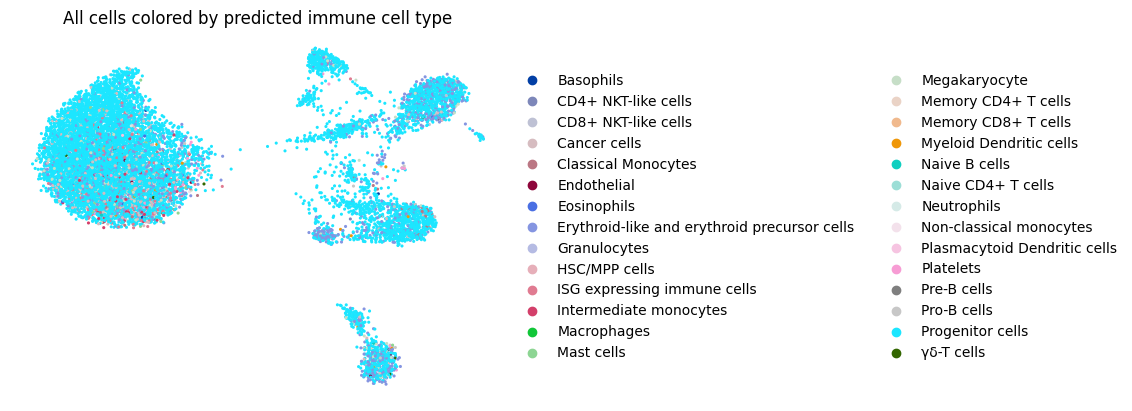

In [20]:
import scanpy as sc

sc.pl.umap(
    adata,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type",
    frameon=False,
    size=20
)


{'0': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Cancer cells & ISG expressing immune cells & Megakaryocyte', '1': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Cancer cells & Megakaryocyte & ISG expressing immune cells', '2': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Cancer cells & ISG expressing immune cells & Megakaryocyte', '3': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Classical Monocytes & Cancer cells & Megakaryocyte', '4': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Megakaryocyte & Cancer cells & Pro-B cells', '5': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Megakaryocyte & Pro-B cells & Platelets', '6': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Megakaryocyte & Platelets & Cancer cells', '7': 'Progenitor cells & Erythroid-like and erythroid precursor cells & Megakaryocyte & Cancer cells & Classical Monocytes', '8':

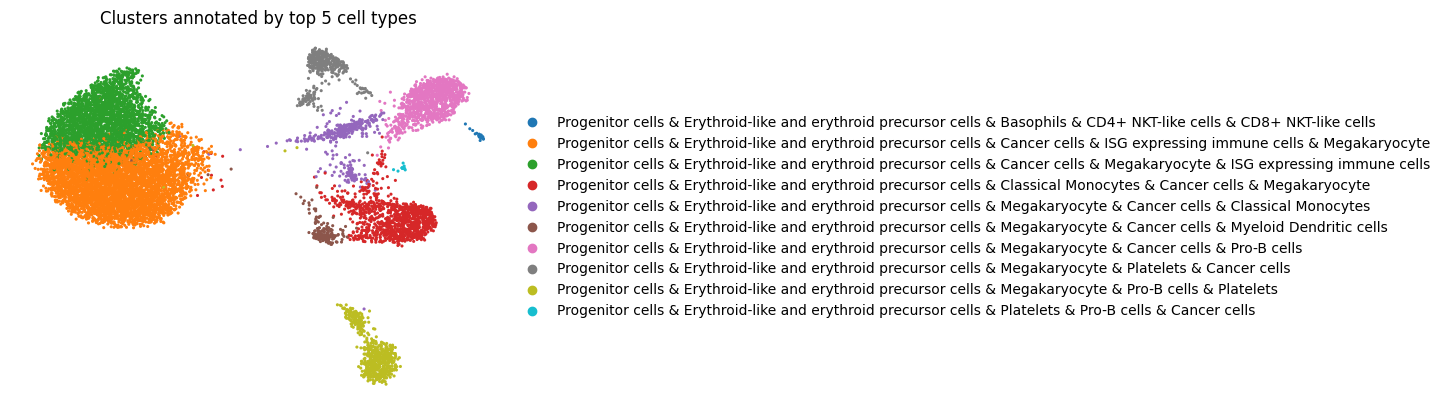

In [21]:
# find the two top cell types per cluster
top2 = (
    ctab
    .apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
    .to_dict()
)

# build a “Cluster 0 → ‘TypeA & TypeB’” mapping
cluster_to_label = {
    cluster: " & ".join(cell_types)
    for cluster, cell_types in top2.items()
}

# map it back into adata.obs
adata.obs["cluster_annotation_top5"] = adata.obs["leiden"].map(cluster_to_label)

# quick check
print(cluster_to_label)

# plot
sc.pl.umap(
    adata,
    color="cluster_annotation_top5",
    legend_loc="right margin",
    title="Clusters annotated by top 5 cell types",
    frameon=False,
    size=20
)


In [22]:
# import re
# import pandas as pd
# import difflib

# # 1) Read your marker table
# #    adjust the path & separator if needed
# markers_df = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')
# print(markers_df.head())

# # 2) Flatten all comma‑separated columns into one set of cleaned, uppercased gene symbols
# marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
# all_markers = set()

# for col in marker_cols:
#     for val in markers_df[col].dropna():
#         # split on commas or semicolons, strip whitespace
#         genes = re.split(r"[,;]+", val)
#         for g in genes:
#             g2 = g.strip().upper()
#             if g2:
#                 all_markers.add(g2)

# print(f"Loaded {len(all_markers)} unique marker symbols from your table.")

# # 3) Uppercase your AnnData var_names for case‑insensitive matching
# adata_1.var_names = adata_1.var_names.str.upper()

# # 4) Exact matches
# obs_genes = set(adata_1.var_names)
# matched = all_markers & obs_genes
# print(f"\n✅ Exact matches: {len(matched)} / {len(all_markers)}")
# print(sorted(matched))

# # 5) If you want to see a few “near‑misses” for the unmatched ones:
# unmatched = all_markers - matched
# fuzzy = {}
# for gene in unmatched:
#     # find up to 3 close var_names, cutoff=0.8
#     close = difflib.get_close_matches(gene, adata_1.var_names, n=3, cutoff=0.8)
#     if close:
#         fuzzy[gene] = close

# print(f"\n🔍 Fuzzy matches found for {len(fuzzy)} markers:")
# for gene, hits in list(fuzzy.items())[:10]:
#     print(f"  {gene} → {hits}")

# # 6) (Optional) If you suspect human⇄rat symbol mismatches,
# #    you can use BioMart or `mygene` to convert human symbols into rat orthologs,
# #    then re–run the same matching logic on that ortholog list.


In [23]:
genesFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/all_genes.csv",header=None)
genesFile.head()

,0,1,2
0,gene_id,gene_name,genome
1,ENSRNOG00000000001,Arsj,mRatBN7-2-113
2,ENSRNOG00000000007,Gad1,mRatBN7-2-113
3,ENSRNOG00000000008,Alx4,mRatBN7-2-113
4,ENSRNOG00000000009,Tmco5b,mRatBN7-2-113


In [24]:
barcodeFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/cell_metadata.csv",header=None)
barcodeFile.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,bc_wells,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,bc3_well
1,01_01_01__s1,cees1_951,mRatBN7-2-113,47,55,72,1,1,1,A1,A1,A1
2,01_01_02__s1,cees1_951,mRatBN7-2-113,18,20,27,1,1,2,A1,A1,A2
3,01_01_03__s1,cees1_951,mRatBN7-2-113,358,493,706,1,1,3,A1,A1,A3
4,01_01_04__s1,cees1_951,mRatBN7-2-113,36,42,55,1,1,4,A1,A1,A4


In [25]:
from scipy.io import mmread

# Read the MTX file
matrix = mmread('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx')

# The result is a sparse matrix
print(matrix)

  (0, 982)	1
  (0, 1450)	1
  (0, 1521)	1
  (0, 1716)	1
  (0, 1772)	1
  (0, 1803)	1
  (0, 3744)	1
  (0, 4035)	1
  (0, 4551)	1
  (0, 4646)	1
  (0, 4894)	1
  (0, 4914)	1
  (0, 5642)	1
  (0, 5659)	1
  (0, 6631)	1
  (0, 6669)	1
  (0, 6692)	1
  (0, 7296)	1
  (0, 7539)	1
  (0, 7833)	1
  (0, 7849)	1
  (0, 7976)	1
  (0, 8422)	1
  (0, 8588)	1
  (0, 8728)	1
  :	:
  (54921, 8171)	1
  (54921, 8894)	1
  (54921, 9754)	1
  (54921, 10515)	1
  (54921, 11280)	1
  (54921, 12000)	1
  (54921, 12507)	1
  (54921, 12749)	1
  (54921, 12890)	1
  (54921, 13697)	4
  (54921, 15053)	1
  (54921, 15873)	1
  (54921, 16176)	1
  (54921, 16192)	2
  (54921, 16771)	1
  (54921, 18302)	1
  (54921, 19080)	1
  (54921, 19393)	1
  (54921, 19600)	1
  (54921, 20654)	1
  (54921, 23128)	1
  (54921, 25544)	1
  (54921, 28408)	1
  (54921, 29634)	1
  (54921, 30453)	0
